<a href="https://colab.research.google.com/github/jarkuszewski/NeuralNetworks/blob/main/withRatchetPocketLearningAlgorithm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Best life Time =12
Best counter =12


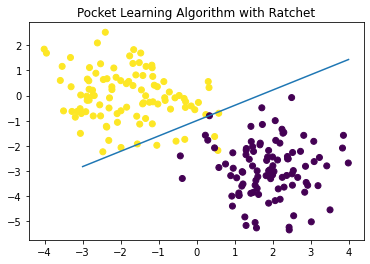

In [ ]:
import numpy as np
from matplotlib import pyplot as plt

def drawPlot(E, T, weights, theta):
  x1, x2 = -3.0 , 4.0
  plt.cla()
  plt.title("Pocket Learning Algorithm with Ratchet")
  plt.scatter(E[:,0], E[:, 1], c = T)
  plt.plot([x1,x2], [-weights[0] / weights[1] * x1 + theta/weights[1], -weights[0] / weights[1] * x2 + theta/weights[1]])

if __name__ == "__main__":

  A = np.random.randn(100,2) + [-2, 0]
  B = np.random.randn(100,2) + [2, -3]

  E = np.zeros((200,2))
  E[0:100] = A
  E[100:200] = B

  T = np.zeros((200,))
  T[0:100] = 1
  T[100:200] = -1

  iterations = 10000
  learningEta = 0.1
  bestLifeTime = 0
  lifeTime = 0
  weights = np.random.default_rng().uniform(-1, 1 ,2)
  theta = np.random.default_rng().uniform(-1, 1, 1)[0]
  bestWeights = weights

  correct = np.full(200,False);
  counter = 0
  bestCounter = 0


  for i in range(iterations):
    j = np.random.randint(0,200)

    O = 1 if np.dot(weights,E[j]) - theta >= 0 else -1

    ERR = T[j] - O
      
    if ERR != 0:
      weights += learningEta * ERR * E[j]
      theta -= learningEta * ERR
      lifeTime = 0
      #jezeli jest zle to ustawiam wszystkie przyklady na nieprzerobione      
      for k in range(200):
        correct = np.full(200,False)

    else:
      lifeTime += 1
      #jezeli jest dobrze to ustaw indeks j w tablicy na TRUE
      if (correct[j] == False):
        correct[j] = True
  
  #zlicz ile jest True
  for k in range(200):
    if(correct[k] == True):
      counter += 1
  
  if bestCounter < counter:
    bestCounter = counter
    counter = 0

    if bestLifeTime < lifeTime:
      bestLifeTime = lifeTime
      bestWeights = weights

  print("Best life Time ={}".format(bestLifeTime))
  print("Best counter ={}".format(bestCounter))
  drawPlot(E, T, bestWeights, theta)
